<h2>Section 1</h2>

<h3>Importing all necessary libraries</h3>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

from sklearn.preprocessing import LabelEncoder,MinMaxScaler

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

<h3>Loading dataset</h3>

In [2]:
df = pd.read_csv(r"C:\Users\aryan\OneDrive\Documents\AlphaIT\Datasets\loan_data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<h3>Dataset shape</h3>

In [3]:
df.shape

(614, 13)

<h3>Dataset memory usage and datatypes with total rows & columns</h3>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<h3>Columns Statistics </h3>

In [5]:
df.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


<h3>Checking null value columns</h3>

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<h3>Distribution of target column</h3>

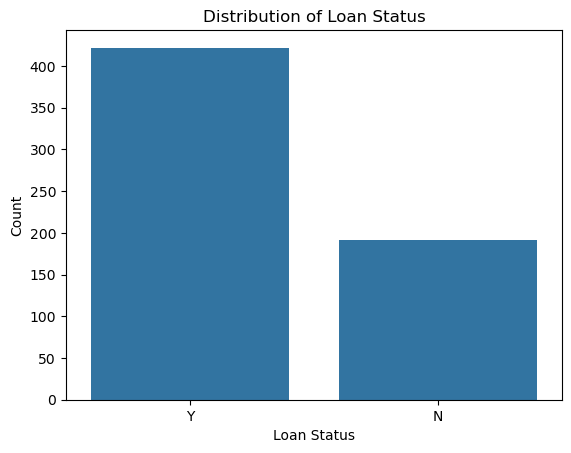

In [7]:
plt.title("Distribution of Loan Status")
sns.countplot(data=df, x=df["Loan_Status"])
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

<h2>Section 2</h2>

<h3>Checking null values</h3>

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<h3>Extracting categorical and numerical columns except target column</h3>

In [9]:
cat_columns = [x for x in df.select_dtypes(include="O") if x != "Loan_Status"]
cat_columns

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [10]:
num_columns = [x for x in df.select_dtypes(exclude="O")]
num_columns

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

<h3>Imputing data</h3>

In [11]:
for i in cat_columns:
    df[i] = df[i].fillna(df[i].mode()[0])
for i in num_columns:
    df[i] = df[i].fillna(df[i].mean())

df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<h3>Encoding target data</h3>

In [12]:
le = LabelEncoder()
df["Loan_Status"] = le.fit_transform(df["Loan_Status"])
df["Loan_Status"].head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

<h3>Distribution of all Categorical columns except Target column</h3>

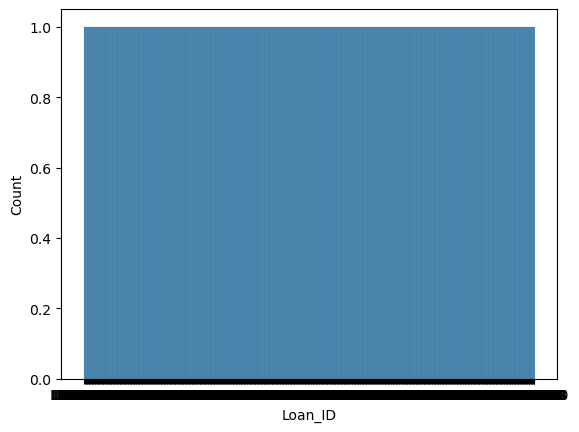

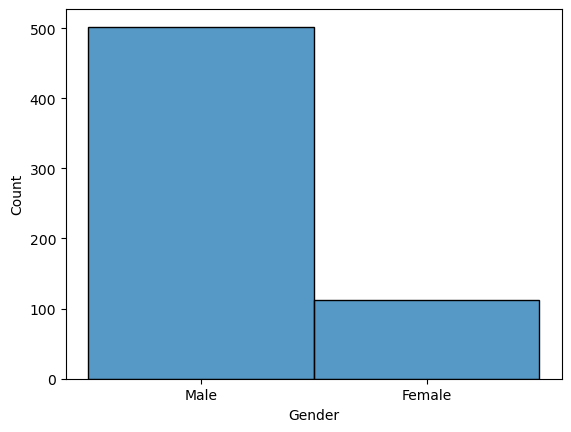

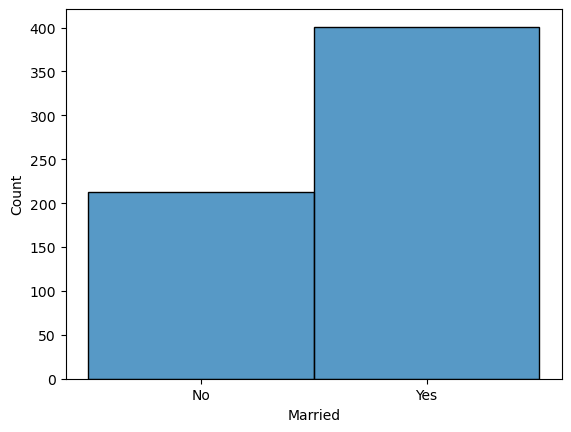

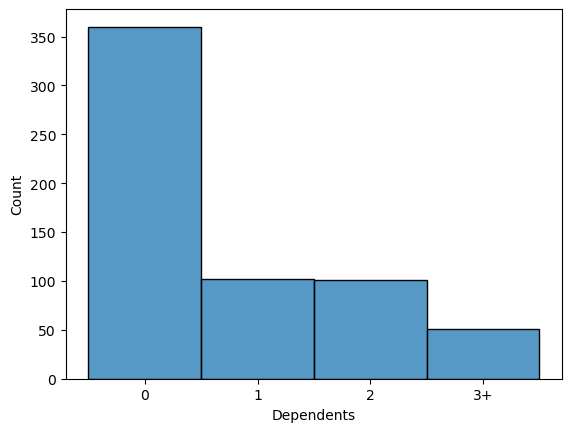

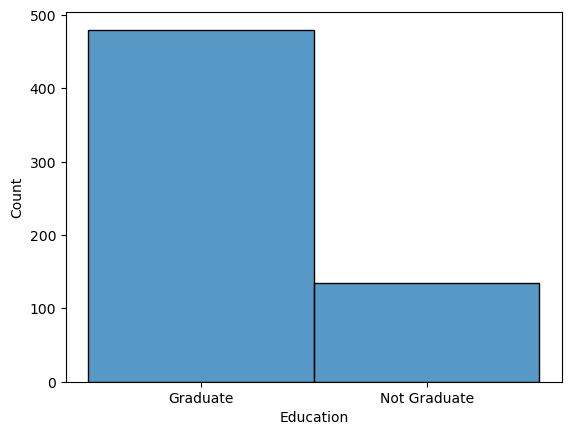

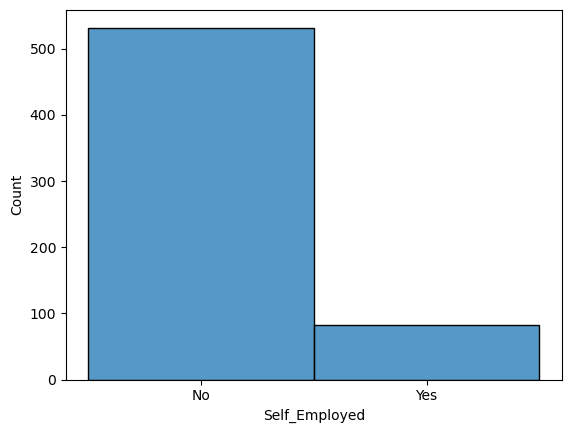

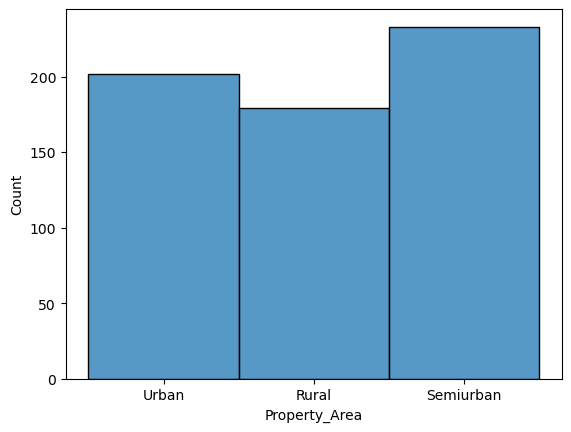

In [13]:
for i in cat_columns:
    sns.histplot(df[i])
    plt.show()

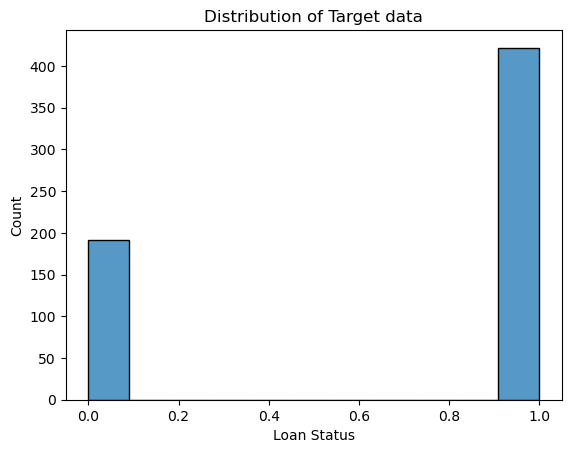

In [14]:
plt.title("Distribution of Target data")
sns.histplot(df["Loan_Status"])
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

<h3>Encoding Categorical data</h3>

In [15]:
for i in cat_columns:
    df[i] = le.fit_transform(df[i])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


<h2>Section 3</h2>

In [16]:
df.drop(columns=["Loan_ID"], inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


<h3>Splitting Dataset</h3>

In [17]:
X = df.drop(["Loan_Status"], axis=1)
Y = df.Loan_Status

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)


len(X_train), len(X_test), len(y_train), len(y_test)

(491, 123, 491, 123)

<h3>Scaling train and test data</h3>

In [19]:
mm = MinMaxScaler()

In [20]:
X_train_scaled = mm.fit_transform(X_train)
X_train_scaled.shape

(491, 11)

In [21]:
X_test_scaled = mm.fit_transform(X_test)
X_test_scaled.shape

(123, 11)

<h3>Comparing multiple models</h3>

In [22]:
models = {
    "LR": LogisticRegression(),
    "SVC": SVC(),
    "DTREE": DecisionTreeClassifier(),
    "RFC": RandomForestClassifier(),
    "GBC": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive": GaussianNB(),
}

acc = {}
for name, model in models.items():
    print(name)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print("Train:", model.score(X_train_scaled, y_train) * 100)
    print("Test:", model.score(X_test_scaled, y_test) * 100)
    print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    acc[name] = accuracy_score(y_test, y_pred) * 100
print(acc)

LR
Train: 80.04073319755601
Test: 85.36585365853658
Accuracy: 85.36585365853658
Confusion Matrix:
 [[21 17]
 [ 1 84]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123

SVC
Train: 80.04073319755601
Test: 85.36585365853658
Accuracy: 85.36585365853658
Confusion Matrix:
 [[21 17]
 [ 1 84]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123

DTREE
Train: 100.0
Test: 61.78861788617886
Accuracy: 61.78861

<h3>Prediction</h3>

In [23]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [24]:
TRY = [1, 1, 1, 0, 0, 4583, 1508.0, 128.000000, 360.0, 1.0, 0]
TRY

[1, 1, 1, 0, 0, 4583, 1508.0, 128.0, 360.0, 1.0, 0]

In [25]:
TRY = mm.fit_transform([TRY])
TRY

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [26]:
lr.predict(TRY)

array([0])

In [27]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0


<h3>Plotting Confusion Matrix</h3>

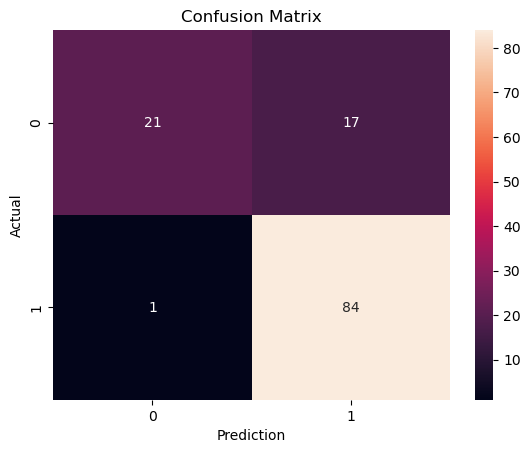

In [28]:
y_pred = lr.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

<h3>Checking Accuracy Score</h3>

In [29]:
accuracy_score(y_test, y_pred) * 100

85.36585365853658

<h3>Creating classification report</h3>

In [30]:
print("Classification Report:", classification_report(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



<h2>Section 4</h2>

<h3>Dumping the model</h3>

In [31]:
import pickle


model_name = "Loan.pkl"


with open(model_name, "wb") as f:

    pickle.dump(lr, f)